# ` Problem Statement:`

Financial institutions face significant losses due to fraudulent credit card transactions. Since fraudulent activities represent a very small fraction of total transactions, detecting them accurately is a challenging task.

The dataset consists of **`284,807 transactions`**, of which only **`492 transactions (0.172%) are fraudulent, making the dataset highly imbalanced.`** Traditional accuracy-based evaluation metrics are not suitable for this problem because a model can achieve very high accuracy by simply predicting all transactions as non-fraudulent.

`The objective of this project is to:`

- Develop a machine` learning classification model` capable of identifying `fraudulent transactions` effectively.

- Handle severe class imbalance using appropriate techniques `(such as SMOTE or class weighting).`

- Minimize `false negatives` (missed fraud cases) while maintaining reasonable false positive rates.

- Evaluate model performance using suitable metrics such as` Precision, Recall, F1-score, ROC-AUC,` instead of relying solely on accuracy.

## `Features Overview`

- All input variables are numerical

- Features V1 to V28 are anonymized` principal components obtained using PCA (Principal Component Analysis)`

- `Due to confidentiality, original feature names and meanings are not available`.

- Two features are not transformed:

- `Time` - Seconds elapsed between each transaction and the first transaction

- `Amount` - Transaction amount

- `Class` - Target variable

- `0 - Normal transaction`

- `1 - Fraud transaction`

### Important Characteristics

- Extremely imbalanced dataset (0.172% fraud)

- Accuracy is not a reliable metric

#### Recommended evaluation metric:
- Area Under the Precision-Recall Curve (AUPRC)

Since fraud cases are rare, metrics like:

- Precision

- Recall

- F1-score

- PR-AUC

are more meaningful than simple confusion matrix accuracy.

**Import Required Libraries**

In [1]:
# Import Basic Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using these library plot's can be clear in notebook
%matplotlib inline

# Ignore the warnings which look clean and neat notebook(cells)
import warnings 
warnings.filterwarnings('ignore')

# For balancing the data we use SMOTE library
from imblearn.over_sampling import SMOTE

# Import model requried libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Evaluation library
from sklearn.metrics import accuracy_score, classification_report

# For data imbalace we use "ROC_AUC_SCORE"
from sklearn.metrics import roc_curve, roc_auc_score

# Ploting the actual and predicted cases using these library
from sklearn.metrics import precision_recall_curve, average_precision_score

**Load Dataset**

In [2]:
creadit_card_df = pd.read_csv('creditcard.csv')
creadit_card_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# total values in dataset
creadit_card_df.size  # Eighty-eight lakh twenty-nine thousand seventeen

8829017

In [4]:
creadit_card_df.shape # (rows, columns)


(284807, 31)

In [5]:
creadit_card_df.columns # column name's

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

The columns names and data as hidden because of some confidental issue

**Exploration ( EDA or Exploratory Data Analysis )**

Let's analyze the data checking of five and last 5 data

In [6]:
creadit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
creadit_card_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Let's check null in dataset

however we know that dataset is already done with PCA analysis & data in a proper way.


In [8]:
# check the null value's in our dataframe

creadit_card_df.isnull().sum().sum()

0

In [9]:
# check the duplicate values

creadit_card_df.duplicated().sum()

1081

here we are not removing duplicate data because customer may done same transcation repeatedly or customer data may have multiple time's & it may be important for model prediction

if model doesn't perform well or struggeling to get best score then we need to remove duplicated data

Let's check column relation's

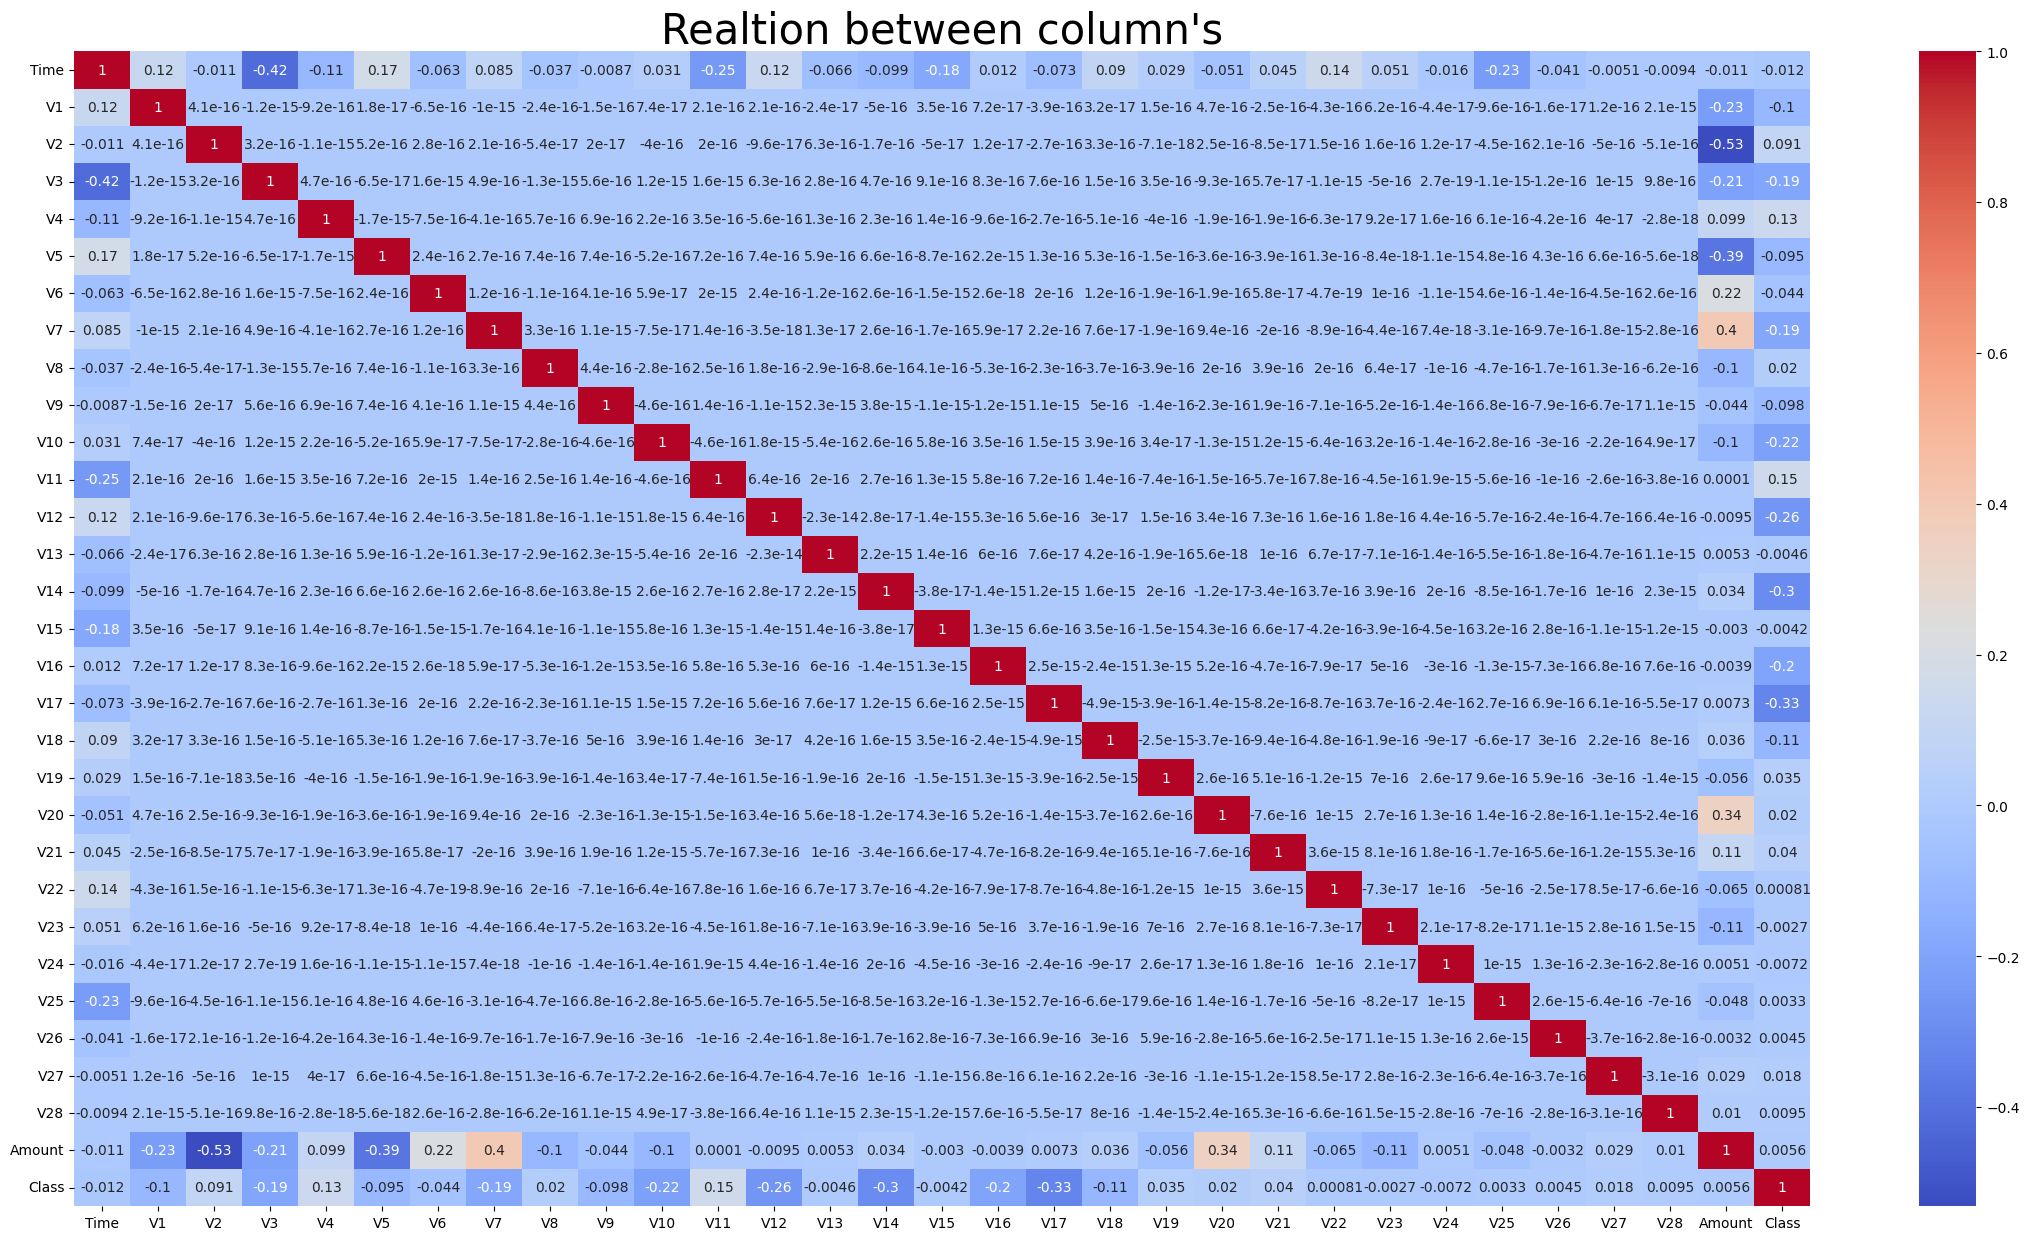

In [19]:
plt.figure(figsize = (28,15))

sns.heatmap(creadit_card_df.corr(), annot = True, cmap = 'coolwarm')
plt.title("Realtion between column's", fontsize = 30)
plt.show()

Let's check how many geniue and fraud transaction are in our data

Here `Class` is Actual column which represent's which type transaction was happen either `fraud or geniue`

In [41]:
creadit_card_df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

- The `Geniue Transaction's` is 284315(2 lakhs 84 thousand 3 hundrend 15) &
- Similarly `Fraud Transaction's` is 492 (4 hundrend 92)

Let's see in percentage How much fraud and geniue occured 

In [42]:
Transaction_type = creadit_card_df.Class.value_counts(normalize = True)*100
Transaction_type

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

- `99% transaction` are geniue 
- some where there is around `0.1% transaction` are Fraud

Visualizing the data for Better understanding

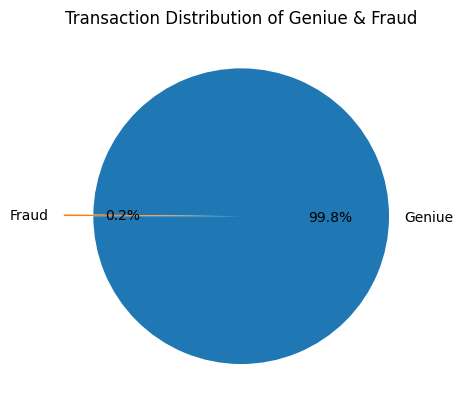

In [43]:
# Plot pie chart

plt.pie(Transaction_type, labels = ['Geniue', 'Fraud'], 
        autopct = '%1.1f%%', 
        startangle = 180,
        explode = [0,0.2] )

plt.title('Transaction Distribution of Geniue & Fraud')
plt.show()

As we obeserved our Actual column as **`Imbalanced Data`**
- which model predict on geniue transaction because geniue as more value's

let's make Actual column as balace data by using `SMOTE (Synthetic Minority Oversampling Technique )` technique

before applying smote technique we observed that our data is in StandardScaler but the `Amount column` looking wried it is not in StandardScaler So we have to Convert into StandardScaler


In [44]:
# Apply StandardScaler

sc = StandardScaler()

creadit_card_df['Normalised_Amount'] = sc.fit_transform(creadit_card_df[['Amount']].values)

Let's remove Amount col because we already done Normalised_amount in dataframe &

Here `Time` Column also not useful for prediction

In [45]:
# Drop columns "Time", "Amount"

creadit_card_df.drop(['Time', 'Amount'], axis = 1, inplace = True)

In [46]:
creadit_card_df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalised_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686


Let's divide data into `X and Y` which is independent and dependent values

In [47]:
X = creadit_card_df.drop('Class', axis = 1)
Y = creadit_card_df.Class 

Let's split the data as `Train Test of X & Y`

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)

In [49]:
Y_train

223361    0
165061    0
238186    0
150562    0
138452    0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: Class, Length: 227845, dtype: int64

As we observed that `Y_train` looking almost `"Zero"` that's means Geniue Transaction 


time to start balance the data

**It's Time to Apply SMOTE**

In [50]:
smote = SMOTE(random_state = 42)

X_train_sm, Y_train_sm = smote.fit_resample(X_train, Y_train)

In [51]:
Y_train_sm  

0         0
1         0
2         0
3         0
4         0
         ..
454897    1
454898    1
454899    1
454900    1
454901    1
Name: Class, Length: 454902, dtype: int64

After smote Data become's balance with one's

Let's apply `value_counts()` to see data is in balance or imbalance

In [52]:
Y_train_sm.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

By ploting `Y_train_sm` we can see that balance Data

<Axes: xlabel='Class'>

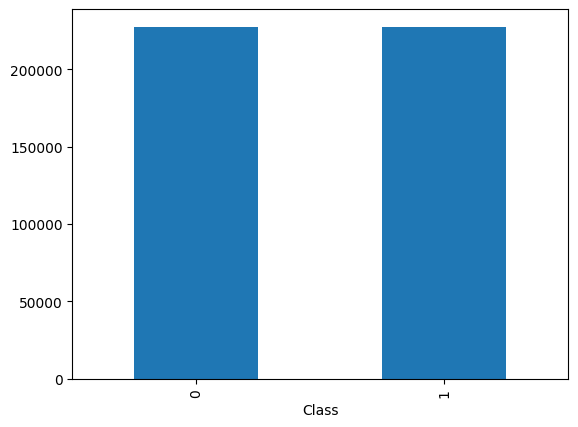

In [53]:
Y_train_sm.value_counts().plot(kind = 'bar')

Let's Start Model Building

**Model Building**

**Logistic Regression**

In [54]:
# create a object for "LogisticRegression()" class

lgr_model = LogisticRegression()

# train on training set of x and y

lgr_model.fit(X_train_sm, Y_train_sm);

In [55]:
# prediction on X_test set

y_pred_lgr = lgr_model.predict(X_test)
y_pred_lgr

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [56]:
# Model Evaluation

print("Logistic Regression Accuracy score : {}". format(accuracy_score(Y_test, y_pred_lgr)*100))


Logistic Regression Accuracy score : 97.43513219339208


In [57]:
print('\nClassification Report :\n{}'.format(classification_report(Y_test, y_pred_lgr)))


Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



**Classification Report :**

`Precision :` model give's accurate fraud answer's
- `100% precision` has correctly identify all `normal transaction`.
- Out of all transactions predicted as fraud, only 6% were actually fraud

`Recall :` how many real frauds data the model caught

- It correctly identified `97% of all actual normal transactions`.
- `92% recall for fraud detection`, meaning it successfully identified most fraudulent transactions.

`f1-score`: Combination of precision + Recall

- 11%  is poor balance between precision and recall

In [58]:
print('Check data balance or imbalance by classification report :\n{}'.format(98/56962))  # Fraud / Total Sample's

Check data balance or imbalance by classification report :
0.0017204452090867595


As we can see data is Extremely `Imbalaced` by `Logistic Regression`.

**Let's perform `ROC_AUC_SCORE`**

Since the data is `imbalance on testing data` so, we need to perform the **`ROC(Receiver Opearting Characteristic) and AUC (Area Under Curve) score`** to see the result's

In [59]:
# get Probabilities

y_prob_lgr = lgr_model.predict_proba(X_test)[:, 1]  # probability of class 1 (fraud)

In [60]:
# Compute ROC + AUC

fpr, tpr, thresholds = roc_curve(Y_test, y_prob_lgr)
auc_score = roc_auc_score(Y_test, y_prob_lgr)*100

print("AUC Score:", auc_score)


AUC Score: 97.95478721877046


Let's plot `"ROC curve"` for better understanding of result's

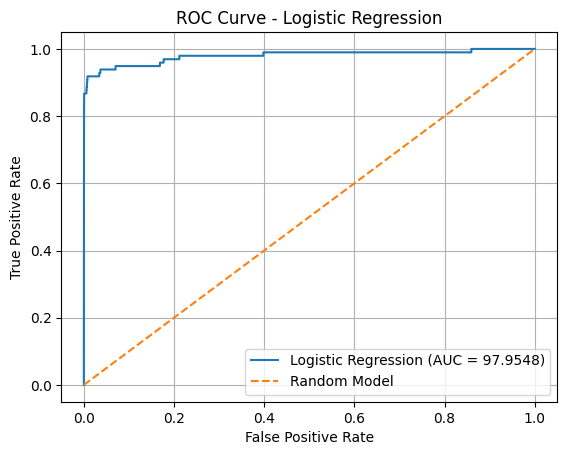

In [61]:
# fig size will be default
plt.figure()

# Plot ROC curve
plt.plot(fpr, tpr, label = "Logistic Regression (AUC = {:.4f})".format(auc_score))

# Plot diagonal line (random model)
plt.plot([0, 1], [0, 1], linestyle = '--', label="Random Model")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")

plt.legend(loc = "lower right")   # Show legend
plt.grid()                  

plt.show()

Let's make better understanding of `precision and recall` by `ploting precision_recall_curve`.

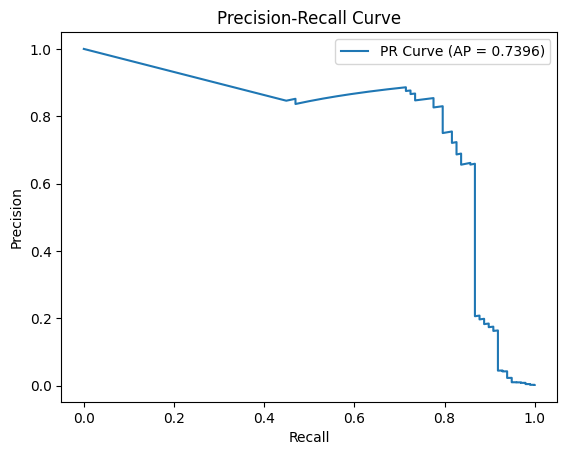

In [62]:
# get precision, recall values
precision, recall, thresholds = precision_recall_curve(Y_test, y_prob_lgr)

# average precision score
ap_score = average_precision_score(Y_test, y_prob_lgr)

# plot precision-recall curve
plt.plot(recall, precision, label = "PR Curve (AP = {:.4f})".format(ap_score))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

After applying `roc_auc_score`. 
- `Precision is high` and `recall is low`.

**Decision Tree Classifier**

In [63]:
# Create a object for class

Tree_model = DecisionTreeClassifier()

# Train the X and Y training set's

Tree_model.fit(X_train_sm, Y_train_sm);

# Predict on X_test set

y_pred_tree = Tree_model.predict(X_test)

In [64]:
# Model Evaluation

print('Decision Tree Accuracy score : {}'.format(accuracy_score(Y_test, y_pred_tree)*100))
print('\nClassification Report :\n{}'.format(classification_report(Y_test, y_pred_tree)))

Decision Tree Accuracy score : 99.74895544398021

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.76      0.51        98

    accuracy                           1.00     56962
   macro avg       0.69      0.88      0.75     56962
weighted avg       1.00      1.00      1.00     56962



**Classification Report**

`Precision :`
- When Model say's `100 fraud's`. but `39 were are actually fraud`.
- So, it is created many `false alarms (false Positive)`.

`Recall :`
- Out of `98 fraud cases model caught 73 frauds`.
- Actual missing is `98 - 73 = 27 fraud cases`.

`f1-score`:
- `recall is 0.73(high)`
- `precision is 0.39 (very low)`
- `f1-score becomes low (0.51)`

`Acuuracy` is not meaningful here because `class 0 is high that's why model focus on class 0 (56864/56962 = 0.9975)`

**Let's perform `ROC_AUC_SCORE`**

Similarly we apply `ROC_AUC_SCORE` for `Decision Tree classifier`.

In [65]:
y_prob_tree = Tree_model.predict_proba(X_test)[:,1]  # probability of class 1 (fraud)

In [66]:
# let's compute ROC + AUC

fpr, tpr, thresholds = roc_curve(Y_test, y_prob_tree)
auc_score = roc_auc_score(Y_test, y_prob_tree)*100

print("AUC Score:", auc_score)

AUC Score: 87.65046641898176


Let's plot the Results of `ROC curve`

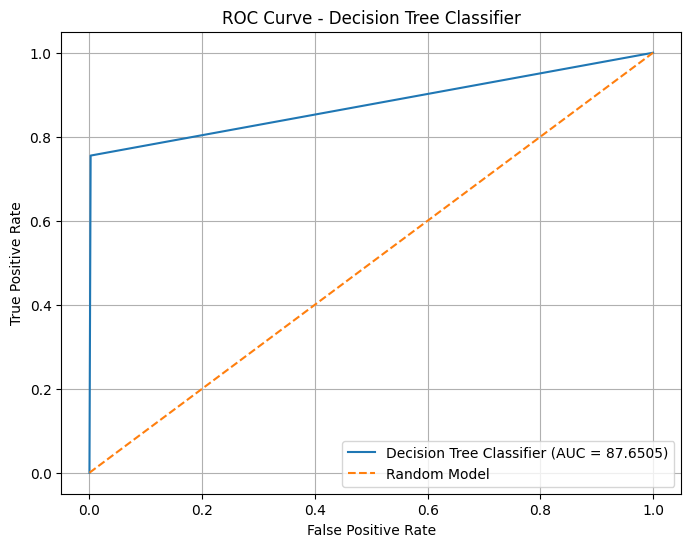

In [67]:
# fig size 
plt.figure(figsize = (8,6))

# plot Roc curve
plt.plot(fpr, tpr, label = "Decision Tree Classifier (AUC = {:.4f})". format(auc_score))

# Plot diagonal line (random model)
plt.plot([0,1], [0,1], linestyle = '--', label = 'Random Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("ROC Curve - Decision Tree Classifier")

plt.legend(loc = 'lower right')
plt.grid()
plt.show()

Let's make better understanding of `precision and recall` by `ploting precision_recall_curve`.

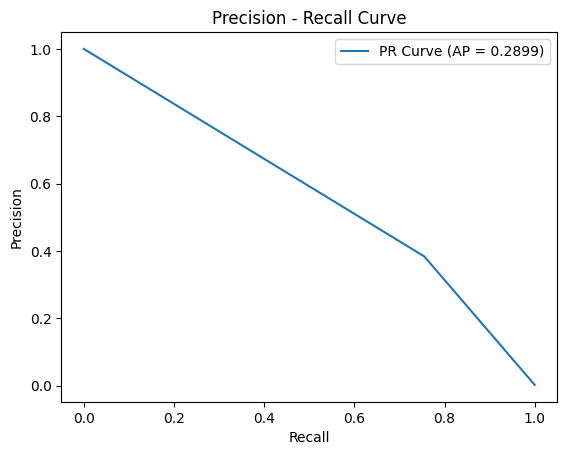

In [68]:
# get precision, recall values
precision, recall, thresholds = precision_recall_curve(Y_test, y_prob_tree)

# Average precision score
ap_score = average_precision_score(Y_test, y_prob_tree)

# plot precision - recall curve
plt.plot(recall, precision, label = 'PR Curve (AP = {:.4f})'.format(ap_score))
plt.xlabel('Recall')
plt.ylabel("Precision")
plt.title("Precision - Recall Curve")
plt.legend()
plt.show()

After performing `precision_recall_curve`
- The precision is high and recall becomes low
- `when model trying to predict more fraud's precision as becomes collab whick look bad.`

**Random Forest Classifier**

In [69]:
# Create a object for class

rfc_model = RandomForestClassifier(n_jobs = -1, random_state = 42)

# Train the X and Y training set's

rfc_model.fit(X_train_sm, Y_train_sm);

# Predict on X_test set

y_pred_rfc = rfc_model.predict(X_test)

In [70]:
# Model Evaluation

print('Ramdom Forest Accuracy score : {}'.format(accuracy_score(Y_test, y_pred_rfc)*100))
print('\nClassification Report :\n{}'.format(classification_report(Y_test, y_pred_rfc)))

Ramdom Forest Accuracy score : 99.95786664794073

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.86      0.88        98

    accuracy                           1.00     56962
   macro avg       0.95      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962



**Classification Report**

`Precision :`
- When Model predict `100 fraud's`. but `89 were are actually fraud`.
- So, it is created few `false alarms (false Positive)`.

`Recall :`
- Out of `98 fraud cases model caught 86 frauds`.
- Actual missing is `98 - 86 = 12 fraud cases`.

`f1-score`:
- `recall is 0.86`
- `precision is 0.89`
- `F1-score is high and balanced, showing strong fraud detection performance (0.88)`.
- Comparing `Logistic and Decision tree`. `Random forest` as given `best classification report`.

Here `Acuuracy` is meaningful because `class 0 and class 1 are fewer difference (56864/56962 = 0.9995)`

**Let's perform `ROC_AUC_SCORE`**

How ever we best Accuracy, precision and recall
- let's see how much roc_curve gives best


In [71]:
# predict the values on x_test set

y_prob_rfc = rfc_model.predict_proba(X_test)[:,1]  # probability of class 1 (fraud)

In [72]:
# let's apply roc_curve 

fpr, tpr, thresholds = roc_curve(Y_test, y_prob_rfc)
auc_score = roc_auc_score(Y_test, y_prob_rfc)*100

print('AUC Score :', auc_score)

AUC Score : 98.48078264789314


Let's plot the AUC_score 

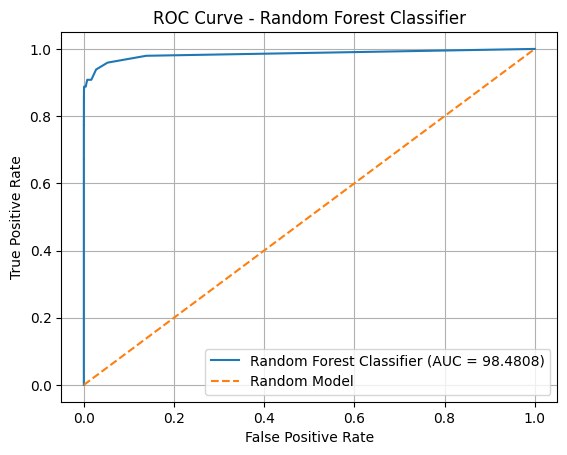

In [73]:
# plot Roc curve
plt.plot(fpr, tpr, label = 'Random Forest Classifier (AUC = {:.4f})'.format(auc_score))

# Plot diagonal line (random model)
plt.plot([0,1], [0,1], label = 'Random Model', linestyle = '--')

plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")

plt.legend()
plt.grid()
plt.show()

Make plot `average_precision_curve` for better understanding of model performance

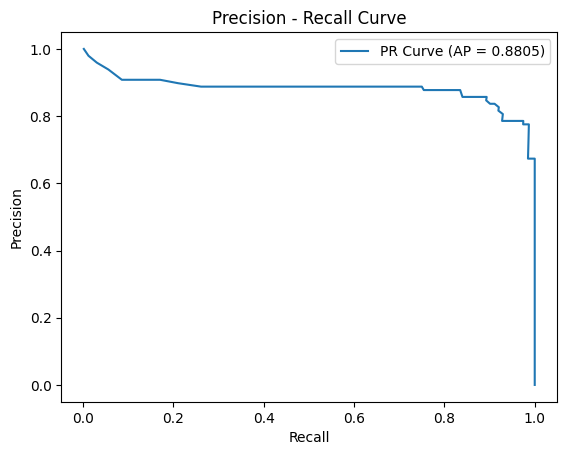

In [78]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_prob_rfc)

ap_score = average_precision_score(Y_test, y_prob_rfc)

plt.plot(precision, recall, label = 'PR Curve (AP = {:.4f})'.format(ap_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision - Recall Curve')

plt.legend()
plt.show()

- 0.88 is the very strong performance 

`on left side`
- high precision, lower recall - the model is very strict when predicting fraud.

`As we move right`
- recall increases - the model detects more fraud cases

`at the far right(recall~1)`
-precision drops sharply - the model flags almost everithing as fraud, increasing false positives.

**Conclusion of the Project**:

1). In `logistic regression` the model as gain `99% percent accuracy` which is misleading due to the imbalance of data
- Fraud Recall is high
- Fraud Precision is low
- F1-Score (fraud) is moderate
- ROC-AUC is good

 We observed that Detected many fraud cases generated more false positives.
 
2). In `Decision tree classifier` the model Accuracy scored is `99.75%`.
- Fraud Precision: 0.39

- Fraud Recall: 0.73

- Fraud F1-Score: 0.51

- ROC-AUC is good

We observed that recall Improved but produced many false alarms.

3). and `Random Forest (Best Performing Model)` & it's `accuracy is 99.95%`

- Fraud Precision: 0.89

- Fraud Recall: 0.86

- Fraud F1-Score: 0.88

- ROC-AUC: Very High (strong class separation)

`Overview :`

The `Random Forest model` demonstrated the most `reliable fraud detection` capability, `achieving high precision and recall with a strong F1-score,` making it suitable for real-world fraud detection systems. The model effectively handled the class imbalance and provided a balanced trade-off between detecting fraudulent transactions and minimizing incorrect fraud alerts.